# Visualizing Errors

### Basic Errorbars

- A basic errorbar can be created with a single Matplotlib function call:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

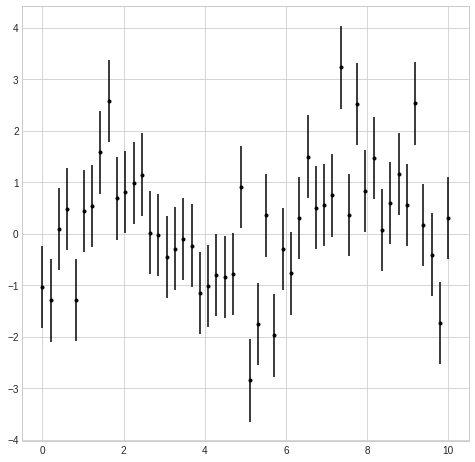

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

fig = plt.figure(figsize=(8,8))

plt.errorbar(x, y, yerr=dy, fmt='.k');

- ``fmt`` is line-and-point format code. It uses the same syntax as the shorthand used in ``plt.plot``, outlined in [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb).


- The ``errorbar`` function has many options to fine-tune the outputs. Example (good for crowded plots): __make the errorbars lighter than the points themselves:__

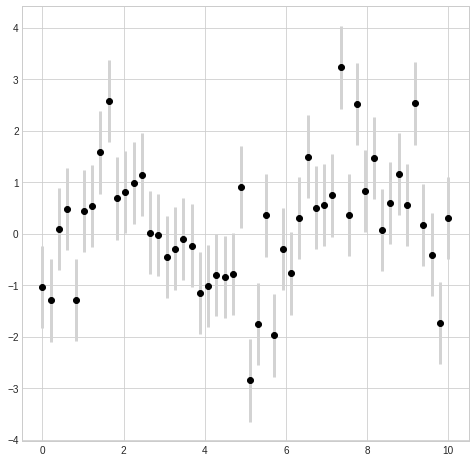

In [3]:
fig = plt.figure(figsize=(8,8))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

- You can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.

### Continuous Errors

- Sometimes you want to show errorbars on continuous quantities. You can combine ``plt.plot`` and ``plt.fill_between`` to do this.
- Example: a __Gaussian process regression__ using the Scikit-Learn API. This fits a non-parametric function to data with a continuous measure of the uncertainty.

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor 

# define the model and draw some data
model = lambda x: x*np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [18]:
xfit = np.linspace(0, 10, 1000)

yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)

dyfit = 2*np.sqrt(MSE) # use 2sigma to approximate 95% confidence

- We now have ``xfit``, ``yfit``, and ``dyfit``, which sample the continuous fit to our data.
- We could pass these to the ``plt.errorbar`` function but we don't really want to plot 1,000 points with 1,000 errorbars.
- Instead, we can use the ``plt.fill_between`` function with a light color to visualize this continuous error:

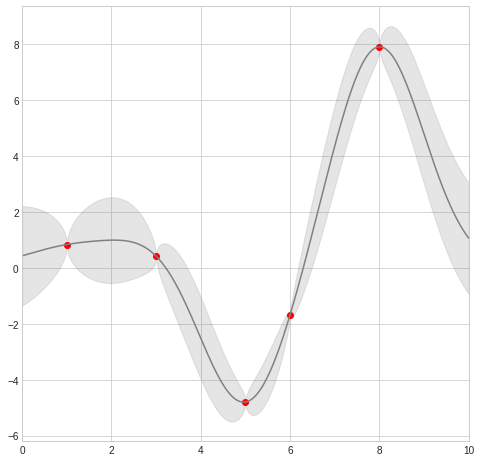

In [19]:
fig = plt.figure(figsize=(8,8))
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

- This provides intuition into what the Gaussian process regression algorithm is doing: 
    * Near a measured data points: the model is strongly constrained and this is reflected in the small model errors.
    * Far from a measured data points: the model is not strongly constrained, and the model errors increase.